In [1]:
import pandas as pd

file_path_1 = "mnist_client1_train.parquet"
file_path_2 = "mnist_client1_test.parquet"
df_train = pd.read_parquet(file_path_1)
df_test = pd.read_parquet(file_path_2)

In [2]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

def prepare_data(df_train, df_test):
    # Extract features (pixel values) and labels
    X_train = df_train.drop('label', axis=1).values
    y_train = df_train['label'].values
    X_test = df_test.drop('label', axis=1).values
    y_test = df_test['label'].values
    
    # Reshape to (num_samples, 28, 28, 1) and normalize
    X_train = np.expand_dims(X_train.reshape(-1, 28, 28) / 255.0, -1)
    X_test = np.expand_dims(X_test.reshape(-1, 28, 28) / 255.0, -1)
    
    return (X_train, y_train), (X_test, y_test)

def train_and_verify(model, x_train, y_train, epochs, x_test, y_test, save_name):
    print(model)

    # Train the model
    history = model.fit(x_train, y_train, 
                       epochs=epochs, 
                       validation_data=(x_test, y_test))
    
    # Make predictions and print classification report
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    # Create a figure with two subplots
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    # Save the model
    model.save(save_name)



c:\Users\avril\Octavo_semestre\REPOSITORIO_ACTIVIDADES_BLOQUE_FINAL\actividades_cc\act_4\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>
Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.6399 - loss: 1.2938 - val_accuracy: 0.3215 - val_loss: 6.7243
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9055 - loss: 0.3219 - val_accuracy: 0.9040 - val_loss: 0.4086
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9348 - loss: 0.2291 - val_accuracy: 0.9710 - val_loss: 0.1015
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.9506 - loss: 0.1652 - val_accuracy: 0.9725 - val_loss: 0.1135
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9568 - loss: 0.1402 - val_accuracy: 0.9800 - val_loss: 0.0635
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      0.99      0.99       215
           2       0.99      0.97      0.98       196
           3       0.96      0.99      0.97       202
   

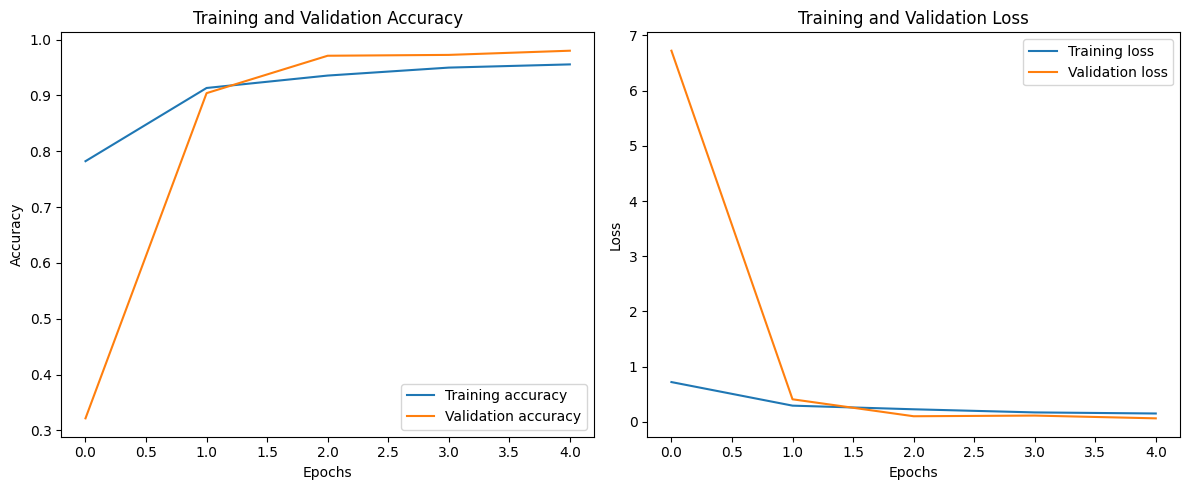

In [3]:
from TheModel import build

# Prepare your data
train_data, test_data = prepare_data(df_train, df_test)
x_train, y_train = train_data
x_test, y_test = test_data

# Build and train a single model
model = build.build_it() 
train_and_verify(model, x_train, y_train, 5, x_test, y_test, "my_model_avril.keras")
